# Context - Water Quality

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

Reference: https://www.kaggle.com/adityakadiwal/water-potability

# Imports

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import randint

from sklearn.model_selection import train_test_split, cross_validate, KFold, RandomizedSearchCV, cross_val_score
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Loading data

In [6]:
data = pd.read_csv('data/water_potability.csv')

In [7]:
print('Data set shape:', data.shape)
data.head()

Data set shape: (3276, 10)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


<b>Feature descriptions:</b>

    1. pH value:
    PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

    2. Hardness:
    Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

    3. Solids (Total dissolved solids - TDS):
    Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

    4. Chloramines:
    Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

    5. Sulfate:
    Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

    6. Conductivity:
    Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

    7. Organic_carbon:
    Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

    8. Trihalomethanes:
    THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

    9. Turbidity:
    The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

    10. Potability:
    Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.
    
Reference: https://www.kaggle.com/adityakadiwal/water-potability

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


<b>Duplicates</b>

In [9]:
print(f'Duplicates in data set: {data.duplicated().sum()}, ({np.round(100*data.duplicated().sum()/len(data),1)}%)')

Duplicates in data set: 0, (0.0%)


<b>Cardinality of features</b>

In [10]:
columns = data.columns
nunique = pd.DataFrame(data[columns].nunique())
nunique.rename(columns = {0 : 'Unique_values'}, inplace = True)
nunique.style.background_gradient(cmap="YlGnBu")

,Unique_values
ph,2785
Hardness,3276
Solids,3276
Chloramines,3276
Sulfate,2495
Conductivity,3276
Organic_carbon,3276
Trihalomethanes,3114
Turbidity,3276
Potability,2


<b>Data types</b>

In [11]:
dtypes = pd.DataFrame(data.dtypes)
dtypes.rename(columns = {0 : 'Dtype'}, inplace = True)
dtypes

,Dtype
ph,float64
Hardness,float64
Solids,float64
Chloramines,float64
Sulfate,float64
Conductivity,float64
Organic_carbon,float64
Trihalomethanes,float64
Turbidity,float64
Potability,int64


# EDA

<b>Target distribution</b>

In [12]:
# Sns config
sns.set_style('whitegrid')
sns.set_palette('muted')

Text(0.5, 1.0, 'Target distribution')

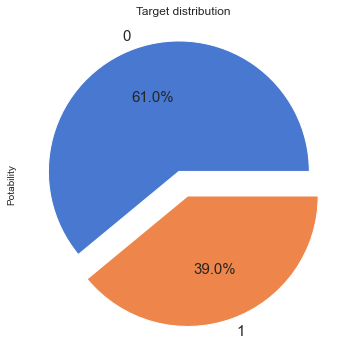

In [13]:
# Figure size
plt.figure(figsize=(6,6))

# Colors
colors = sns.color_palette('muted')[0:2]

# Pie plot
data['Potability'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', textprops={'fontsize':15}, colors = colors).set_title("Target distribution")

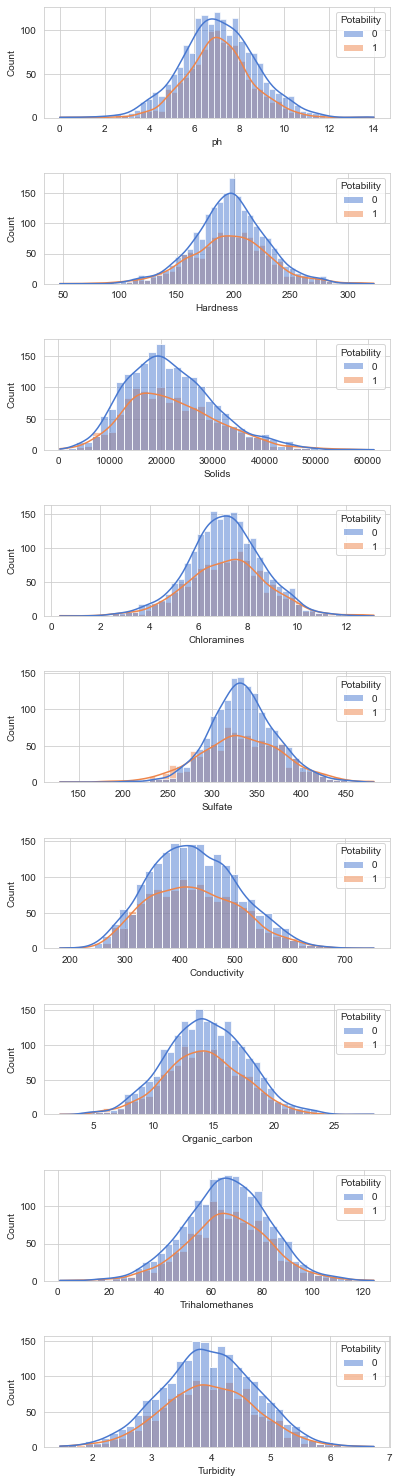

In [14]:
count = 1

# Set figsize
plt.figure(figsize = (6,25))

# Set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)

for column in data.columns[:-1]:  
    ax = plt.subplot(9,1,count)
    sns.histplot(data=data, x=column, hue='Potability', kde=True)
    count += 1

<b>Data Correlation</b>

In [15]:
corr = data.corr()
corr.style.background_gradient(cmap="YlGnBu")

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


- There are no strong correlation beetween the 

<b>Missing values</b>

In [16]:
print('Data set missing values:')
isnull = pd.DataFrame(data.isnull().sum())
isnull['Percentage'] = data.isnull().mean()*100 
isnull.rename(columns = {0 : 'Missing_values'}, inplace = True)
isnull.style.background_gradient(cmap="YlGnBu")

Data set missing values:


,Missing_values,Percentage
ph,491,14.987790
Hardness,0,0.000000
Solids,0,0.000000
Chloramines,0,0.000000
Sulfate,781,23.840049
Conductivity,0,0.000000
Organic_carbon,0,0.000000
Trihalomethanes,162,4.945055
Turbidity,0,0.000000
Potability,0,0.000000


<b>ph:</b> 491 - 14.98 % <br>
<b>Sulfate:</b> 781 - 23.84 % <br>
<b>Trihalomethanes:</b> 162 - 4.94 %

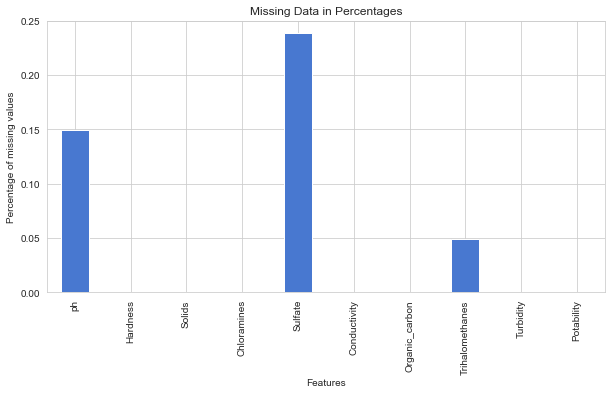

In [17]:
data.isnull().mean().plot.bar(figsize=(10,5)) 
plt.ylabel('Percentage of missing values') 
plt.xlabel('Features') 
plt.title('Missing Data in Percentages');

In [18]:
X = data.drop('Potability', axis=1)
y = data['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [19]:
X_train.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
2985,NaN,188.445469,28791.614416,8.040356,382.009477,422.234861,10.575690,63.235365,3.228379
1073,7.203439,168.445358,22826.484697,6.283250,271.892045,437.370863,16.410654,64.505923,6.389161
3140,NaN,242.827588,29298.074262,5.853840,340.348645,463.115174,5.426650,NaN,3.522586
2643,6.056818,211.765886,4440.277357,9.507303,NaN,316.921776,17.766397,53.541191,3.358061
2174,9.581189,223.296216,28292.780318,5.665431,NaN,398.479317,11.350768,44.574120,3.929178


In [20]:
X_train.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,1939.000000,2293.000000,2293.000000,2293.000000,1731.000000,2293.000000,2293.000000,2180.000000,2293.000000
mean,7.096329,196.551035,22113.841276,7.114603,333.687852,426.699124,14.252296,66.450922,3.958445
std,1.590718,32.823436,8899.279189,1.575875,41.631895,81.657696,3.290887,16.288173,0.777717
min,0.000000,73.492234,728.750830,0.352000,129.000000,181.483754,4.371899,8.175876,1.492207
25%,6.096154,176.753500,15737.468938,6.105708,307.592458,367.854025,12.049131,55.746769,3.434538
50%,7.015333,197.331291,20988.429410,7.131704,332.349949,421.890083,14.171164,66.697224,3.941074
75%,8.074703,217.283262,27215.902742,8.107067,360.259558,481.853415,16.557177,77.578607,4.496627
max,14.000000,323.124000,61227.196008,13.043806,481.030642,753.342620,28.300000,124.000000,6.739000


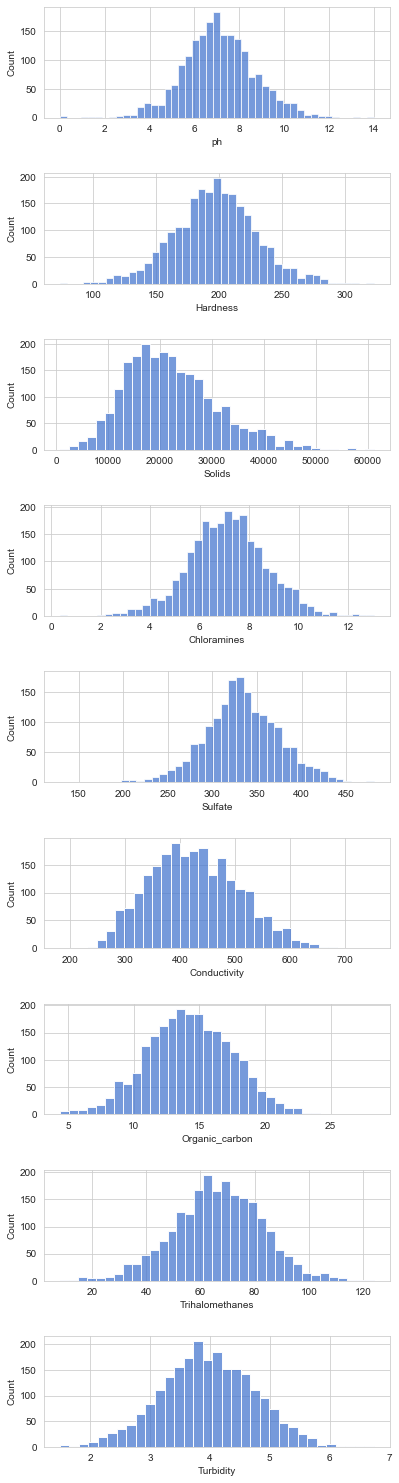

In [21]:
count = 1

# Set figsize
plt.figure(figsize = (6,25))

# Set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.5)

for column in data.columns[:-1]:  
    ax = plt.subplot(9,1,count)
    sns.histplot(data=X_train, x=column)
    count += 1

In [22]:
print('Train - missing values:')
isnull = pd.DataFrame(X_train.isnull().sum())
isnull['Percentage'] = data.isnull().mean()*100 
isnull.rename(columns = {0 : 'Missing_values'}, inplace = True)
isnull.style.background_gradient(cmap="YlGnBu")

Train - missing values:


,Missing_values,Percentage
ph,354,14.987790
Hardness,0,0.000000
Solids,0,0.000000
Chloramines,0,0.000000
Sulfate,562,23.840049
Conductivity,0,0.000000
Organic_carbon,0,0.000000
Trihalomethanes,113,4.945055
Turbidity,0,0.000000


- Using <b>SimpleImputer</b> to imput the missing values
- We have to split train test before use this method because we need to use mean, median or mode from each split.

In [23]:
imputer = SimpleImputer(strategy='median')

imputer.fit(X_train)

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [24]:
X_test= pd.DataFrame(X_test)
X_train= pd.DataFrame(X_train)

new_X = pd.concat([X_train, X_test], ignore_index=True)
new_y = pd.concat([y_train, y_test], ignore_index=True)

# Modeling

## DummyClassifier

In [25]:
SEED = 2706
np.random.seed(SEED)

model = DummyClassifier()
results = cross_validate(model, new_X, new_y, cv = 10)
mean = results['test_score'].mean()
std = results['test_score'].std()
print(f'Accuracy com dummy stratified - cv = 10 = [{(mean - 2 * std) * 100:.2f}%, {(mean + 2 * std) * 100:.2f}%]')

Accuracy com dummy stratified - cv = 10 = [60.79%, 61.19%]


In [26]:
def print_results(results):
    mean = results['test_score'].mean() * 100
    std = results['test_score'].std() * 100
    print(f"Accuracy ({mean:.2f}%)")
    print(f"Range [{mean - 2 * std:.2f}%, {mean + 2 * std:.2f}%]")
    
def print_scores(scores):
    mean = scores.mean() * 100
    std = scores.std() * 100
    print(f"Accuracy ({mean:.2f}%)")
    print(f"Range [{mean - 2 * std:.2f}%, {mean + 2 * std:.2f}%]")

## SVC

In [27]:
SEED = 2706
np.random.seed(SEED)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVC()

cv = KFold(n_splits = 10)
results = cross_validate(model, new_X, new_y, cv = cv, return_train_score=False)
print_results(results)

Accuracy (60.99%)
Range [57.48%, 64.50%]


## RandomizedSearchCV with DecisionTreeClassifier

In [28]:
SEED = 2706
np.random.seed(SEED)

params = {
    "max_depth" : [3, 5, 10, 15, 20, 30, None],
    "min_samples_split" : randint(32, 256),
    "min_samples_leaf" : randint(32, 256),
    "criterion" : ["gini", "entropy"]
}

model = DecisionTreeClassifier()
search = RandomizedSearchCV(model,
                           params,
                           cv = KFold(n_splits=5, shuffle=True),
                           n_iter = 128,
                           random_state = SEED)

search.fit(new_X, new_y)
results = pd.DataFrame(search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008602,4.900182e-04,0.0010,1.168008e-07,gini,5,93,237,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.623476,0.636641,0.647328,0.619847,0.596947,0.624848,0.017028,60
1,0.008402,4.900182e-04,0.0006,4.899014e-04,gini,15,185,52,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.628049,0.615267,0.630534,0.618321,0.619847,0.622404,0.005867,77
2,0.008402,4.899793e-04,0.0010,1.507891e-07,gini,10,188,204,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.628049,0.615267,0.630534,0.618321,0.619847,0.622404,0.005867,77
3,0.010002,6.325605e-04,0.0012,3.999949e-04,gini,30,119,218,"{'criterion': 'gini', 'max_depth': 30, 'min_sa...",0.623476,0.619847,0.627481,0.639695,0.632061,0.628512,0.006916,37
4,0.008002,1.168008e-07,0.0008,4.001619e-04,entropy,3,200,78,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.628049,0.621374,0.595420,0.613740,0.601527,0.612022,0.012108,101


In [29]:
SEED = 2706
np.random.seed(SEED)

scores = cross_val_score(search, new_X, new_y, cv = KFold(n_splits = 5, shuffle = True))
print_scores(scores)
best = search.best_estimator_
best

Accuracy (63.55%)
Range [61.30%, 65.81%]


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=105,
                       min_samples_split=66)

## RandomizedSearchCV with RandomForestClassifier

In [34]:
np.random.seed(SEED)

params = {
    "n_estimators":[10, 50, 100, 200],
    "max_features":['auto', 'sqrt', 'log2'],
    "max_depth":list(range(1,11))
}

model = RandomForestClassifier()
search = RandomizedSearchCV(model,
                           params,
                           cv = KFold(n_splits=5, shuffle=True),
                           n_iter = 16,
                           random_state = SEED)

search.fit(new_X, new_y)
results = pd.DataFrame(search.cv_results_)
results.head()

CPU times: total: 19.5 s
Wall time: 19.5 s


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.316071,0.004196,0.010002,0.00000,100,log2,7,"{'n_estimators': 100, 'max_features': 'log2', ...",0.666159,0.685496,0.651908,0.647328,0.632061,0.656590,0.018091,4
1,0.187042,0.000633,0.008602,0.00049,100,log2,3,"{'n_estimators': 100, 'max_features': 'log2', ...",0.632622,0.654962,0.604580,0.625954,0.616794,0.626982,0.016860,11
2,0.112425,0.002499,0.005201,0.00040,50,sqrt,4,"{'n_estimators': 50, 'max_features': 'sqrt', '...",0.646341,0.668702,0.615267,0.630534,0.615267,0.635222,0.020312,8
3,0.311470,0.004631,0.016204,0.00040,200,auto,2,"{'n_estimators': 200, 'max_features': 'auto', ...",0.635671,0.647328,0.601527,0.619847,0.610687,0.623012,0.016583,12
4,0.640343,0.007861,0.018604,0.00049,200,log2,7,"{'n_estimators': 200, 'max_features': 'log2', ...",0.670732,0.687023,0.651908,0.650382,0.632061,0.658421,0.018823,3


In [41]:
SEED = 2706
np.random.seed(SEED)
scores = cross_val_score(search, new_X, new_y, cv = KFold(n_splits = 5, shuffle = True))
print_scores(scores)
best = search.best_estimator_
best

Accuracy (66.06%)
Range [62.42%, 69.69%]


RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=50)

# Conclusion
- There are low correlation coefficients between the features.
- Random Forest was the best model.
- The average accuracy between the DummyClassifier and the best model (RandomForest) was only 5.07%.